# Higgs Boson Machine Learning Challenge

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [37]:
# Import methods from scripts/
from path import (add_src_to_path, create_out_dir, extract_archives,
                  DATA_TRAIN_PATH)
from proj1_helpers import load_csv_data, predict_labels

# Add src to path to import implementations
add_src_to_path()

# Import functions from src/
from clean_data import clean_data_by_jet, get_columns_to_remove_by_jet
from implementations import logistic_regression
from metrics import accuracy_score, confusion_matrix, get_proportions
from plot_utils import plot_confusion_matrix, plot_counts
from print_utils import print_shapes, print_shapes_by_jet
from split_data import split_by_jet, split_train_test

In [3]:
# Extract archives if needed
extract_archives()

# Create output directory if needed
create_out_dir()

In [4]:
# Load the data
y, x, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False, label_b=0)
print_shapes(y, x)

Shape of y: (250000,)
Shape of x: (250000, 30)


Proportions: {0: 0.657332, 1: 0.342668}


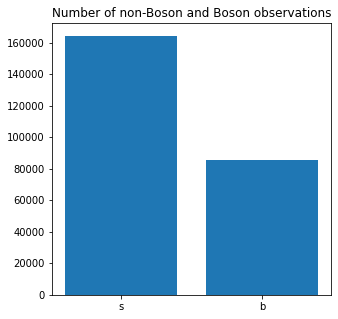

In [5]:
# Get proportions
proportions = get_proportions(y)
print('Proportions:', proportions)

# Plot counts
plot_counts(y, title='Number of non-Boson and Boson observations')

In [6]:
# Split the data by jet
JET_COL = 22
MAX_JET = 3
y_by_jet, x_by_jet = split_by_jet(y, x, JET_COL, MAX_JET, clean=False)
print_shapes_by_jet(y_by_jet, x_by_jet)

Jet = 0:
Shape of y: (99913,)
Shape of x: (99913, 29)
Jet = 1:
Shape of y: (77544,)
Shape of x: (77544, 29)
Jet = 2:
Shape of y: (50379,)
Shape of x: (50379, 29)
Jet = 3:
Shape of y: (22164,)
Shape of x: (22164, 29)


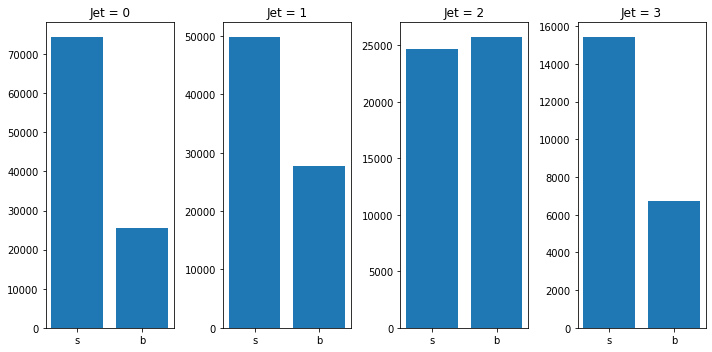

In [7]:
# Plot counts
fig, axs = plt.subplots(ncols=4, figsize=(10, 5))
for i, y_jet, ax in zip(range(MAX_JET + 1), y_by_jet, axs):
    plot_counts(y_jet, f'Jet = {i}', ax)
plt.tight_layout()

In [8]:
# Get columns to remove by jet
cols_to_remove_by_jet = get_columns_to_remove_by_jet(x_by_jet)
for i in range(MAX_JET + 1):
    print(f'Jet = {i}:', cols_to_remove_by_jet[i])

Jet = 0: [ 4  5  6 12 22 23 24 25 26 27 28]
Jet = 1: [ 4  5  6 12 25 26 27]
Jet = 2: []
Jet = 3: []


In [9]:
# Clean data by jet
clean_data_by_jet(x_by_jet)
print_shapes_by_jet(y_by_jet, x_by_jet)

Jet = 0:
Shape of y: (99913,)
Shape of x: (99913, 18)
Jet = 1:
Shape of y: (77544,)
Shape of x: (77544, 22)
Jet = 2:
Shape of y: (50379,)
Shape of x: (50379, 29)
Jet = 3:
Shape of y: (22164,)
Shape of x: (22164, 29)


In [10]:
# Split data
SPLIT_RATIO = 0.8
x_tr, x_te, y_tr, y_te = split_train_test(y, x, SPLIT_RATIO)
print('Training data:')
print_shapes(y_tr, x_tr)
print('Test data:')
print_shapes(y_te, x_te)

Training data:
Shape of y: (200000,)
Shape of x: (200000, 30)
Test data:
Shape of y: (50000,)
Shape of x: (50000, 30)


In [11]:
# Split train data by jet
y_tr_by_jet, x_tr_by_jet = split_by_jet(y_tr, x_tr, clean=True)
print_shapes_by_jet(y_tr_by_jet, x_tr_by_jet)

Jet = 0:
Shape of y: (79923,)
Shape of x: (79923, 18)
Jet = 1:
Shape of y: (61985,)
Shape of x: (61985, 22)
Jet = 2:
Shape of y: (40333,)
Shape of x: (40333, 29)
Jet = 3:
Shape of y: (17759,)
Shape of x: (17759, 29)


In [12]:
# Split test data by jet
y_te_by_jet, x_te_by_jet = split_by_jet(y_te, x_te)
clean_data_by_jet(x_te_by_jet)
print_shapes_by_jet(y_te_by_jet, x_te_by_jet)

Jet = 0:
Shape of y: (19990,)
Shape of x: (19990, 18)
Jet = 1:
Shape of y: (15559,)
Shape of x: (15559, 22)
Jet = 2:
Shape of y: (10046,)
Shape of x: (10046, 29)
Jet = 3:
Shape of y: (4405,)
Shape of x: (4405, 29)


In [13]:
# Run classification algorithm on train data by jet
max_iters = 2000
gamma = 1e-5
threshold = 1e-8
w_by_jet = list()
for i, x_tr_jet, y_tr_jet in zip(
    range(len(x_tr_by_jet)), x_tr_by_jet, y_tr_by_jet):
    print(f'Jet = {i}:')
    initial_w = np.zeros((x_tr_jet.shape[1], 1))
    w, _ = logistic_regression(y_tr_jet, x_tr_jet, initial_w,
                                max_iters, gamma, threshold,
                                info=True, sgd=False)
    print(w)
    w_by_jet.append(w)

Jet = 0:
Iter: 00000/2000 - Loss: 46549.94
Iter: 00100/2000 - Loss: 32292.60
Iter: 00200/2000 - Loss: 31650.40
Iter: 00300/2000 - Loss: 31405.87
Iter: 00400/2000 - Loss: 31299.28
Iter: 00500/2000 - Loss: 31249.76
Iter: 00600/2000 - Loss: 31225.77
Iter: 00700/2000 - Loss: 31213.84
Iter: 00800/2000 - Loss: 31207.79
Iter: 00900/2000 - Loss: 31204.69
Iter: 01000/2000 - Loss: 31203.09
Iter: 01100/2000 - Loss: 31202.26
Iter: 01200/2000 - Loss: 31201.82
Iter: 01300/2000 - Loss: 31201.59
Iter: 01400/2000 - Loss: 31201.47
Iter: 01500/2000 - Loss: 31201.41
Iter: 01600/2000 - Loss: 31201.38
Iter: 01700/2000 - Loss: 31201.36
Iter: 01800/2000 - Loss: 31201.35
Iter: 01900/2000 - Loss: 31201.35
[-1.81042841e+00 -5.80544726e-02 -4.34104971e-01 -2.92647102e+00
  1.84599670e-02  2.10636935e+00  1.84585443e-02  8.37763116e-01
 -1.14155422e+00 -8.50451824e-03  4.44155222e-01  3.32079506e-03
  2.00042235e-03  8.92120319e-01  1.93158140e-02  4.29917751e-05
  4.18632604e-03 -2.38255593e-02  1.04841964e-01]
J

Jet = 0:
Accuracy score: 0.82
Jet = 1:
Accuracy score: 0.70
Jet = 2:
Accuracy score: 0.73
Jet = 3:
Accuracy score: 0.72


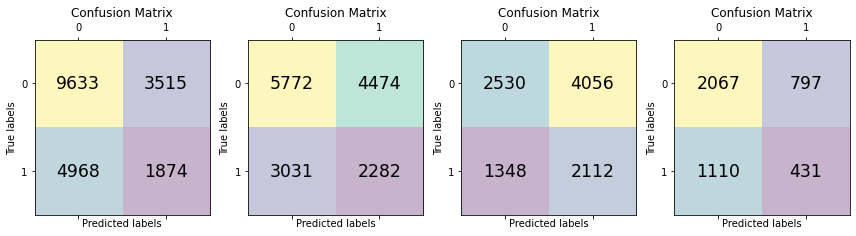

In [14]:
# Predict test data by jet
fig, axs = plt.subplots(ncols=4, figsize=(12, 12))
y_pred_by_jet = list()
for i, w, x_te_jet, y_te_jet, ax in zip(
    range(len(x_te_by_jet)), w_by_jet,x_te_by_jet, y_te_by_jet, axs):
    print(f'Jet = {i}:')
    x_te_jet = np.c_[np.ones((y_te_jet.shape[0], 1)), x_te_jet]
    y_pred = predict_labels(w, x_te_jet, label_b_in=0, label_b_out=0,
                            use_sigmoid=True)
    y_pred_by_jet.append(y_pred)
    print(f'Accuracy score: {accuracy_score(y_te_jet, y_pred):.2f}')
    conf_matrix = confusion_matrix(y_te, y_pred)
    plot_confusion_matrix(conf_matrix, ax=ax)
plt.tight_layout()

Accuracy score: 0.76
Confusion matrix:


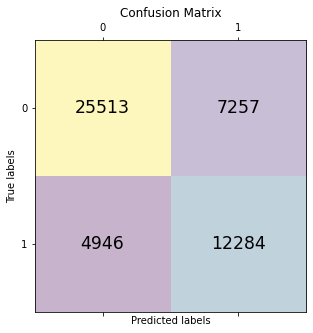

In [15]:
# Concatenate results
y_te = np.concatenate(y_te_by_jet)
y_pred = np.concatenate(y_pred_by_jet)

# Global accuracy
print(f'Accuracy score: {accuracy_score(y_te, y_pred):.2f}')

# Global confusion matrix
print('Confusion matrix:')
conf_matrix = confusion_matrix(y_te, y_pred)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix)

jet 0 :
[16 14 11 10  3  5 13  2 17  6 12  8  4 15  0  9  7  1]
[16 14 11 10  3  5 13  2 17  6 12  8 15  4  9  0  7  1]
jet 1 :
[20 10 19 14 16 11 13 15  2  4  5 12 17  3 18 21  6  0  7  9  8  1]
[20 10 19 14 16 11 13 15  2  4  5 12 17  3 18 21  6  7  0  9  8  1]
jet 2 :
[26 18 15 24 23 14 17 20 27 16  2 21  7 19 25 22 28  8  9 10  3  0 13 11
  1  6 12  4  5]
[26 18 15 24 23 14 17 20 27 16  2 21  7 19 25 22 28  8  9 10  3  0 13  1
 11  6 12  4  5]
jet 3 :
[15  9 27 24 21 23 18 22 14 17 20 26 16 28  8  2 25  7 19  6 10  4  0  5
 12 13  3  1 11]
[15  9 27 24 23 21 18 22 14 17 20 26 16 28  8  2 25  7 19  6 10  4  5 12
  0 13  3  1 11]


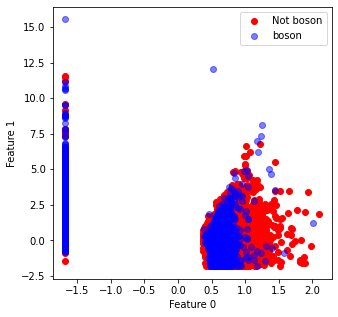

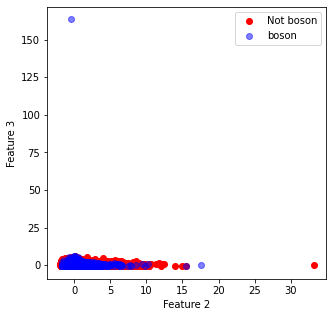

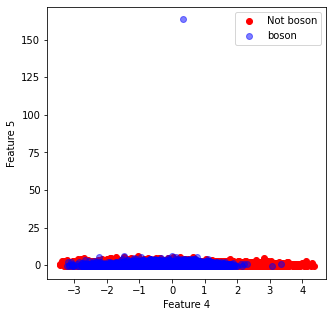

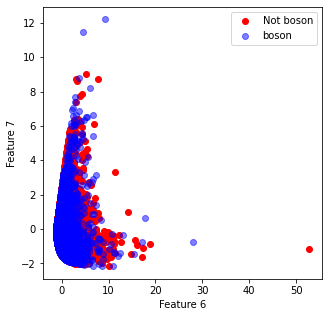

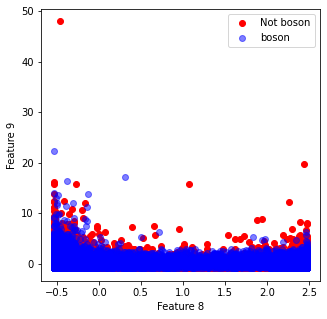

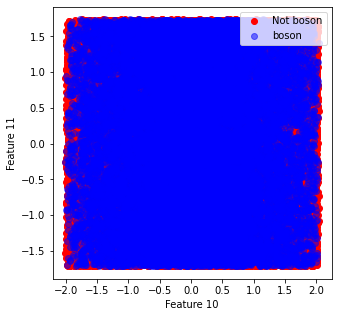

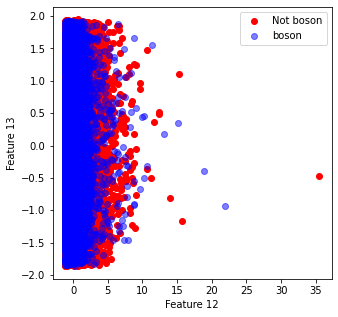

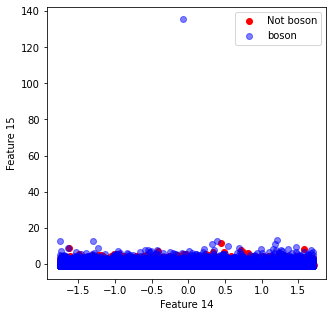

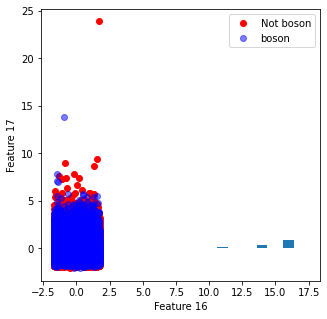

In [19]:
from plot_utils import scatter_all_features
from stats_tests import anova_test
from sklearn.feature_selection import f_classif



for i,x_jet,y_jet in zip(range(len(x_tr_by_jet)),x_tr_by_jet,y_tr_by_jet):
    print(f"jet {i} :")
    F,P=f_classif(x_jet,y_jet)
    print(np.argsort(F))
    f=anova_test(x_jet,y_jet,label_b=0)
    #F,P=f_classif(x,y_jet)
    #print(np.sort(f))
    if i==0:
        scatter_all_features(x_jet,y_jet)
    if i==0:
        plt.bar(np.argsort(P),np.sort(P))

-0.14075304138437222
0.8658144198538265
2.523760601738164
1.0053086372288595


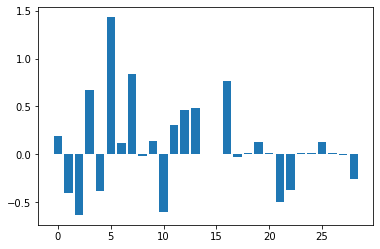

In [17]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

for i,x_jet,y_jet in zip(range(len(x_tr_by_jet)),x_tr_by_jet,y_tr_by_jet):
    # fit the model
    model.fit(x_jet, y_jet)
    # get importance
    importance = model.coef_[0]
    print(np.sum(importance))
    if False:
        plt.subplot(2,2,i+1)
        plt.bar(np.argsort(importance),np.sort(importance))
    if i==2:
        plt.bar(np.argsort(importance),np.sort(importance))


0.010101010101010166
[-0.00514031 -0.1197045  -0.1816063  -0.0083396   0.16198865 -0.00833966
  0.06847512 -0.06780229  0.01699558  0.06492891 -0.00088065 -0.00053792
  0.04309965  0.00380747 -0.00039375  0.03079482 -0.00293554  0.01512187]


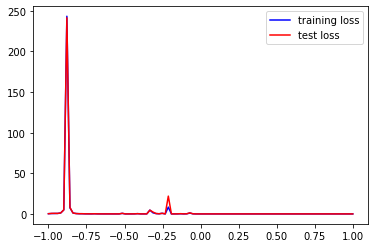

In [61]:
from implementations import ridge_regression_cross_validation
lambdas=np.linspace(-1,1,100)
y=y_tr_by_jet[0]
x=x_tr_by_jet[0]
w,loss=ridge_regression_cross_validation(y, x, lambdas, k_fold=4, plot=True)
print(w)

In [41]:
print(np.logspace(-4, 0, 20))

[1.00000000e-04 1.62377674e-04 2.63665090e-04 4.28133240e-04
 6.95192796e-04 1.12883789e-03 1.83298071e-03 2.97635144e-03
 4.83293024e-03 7.84759970e-03 1.27427499e-02 2.06913808e-02
 3.35981829e-02 5.45559478e-02 8.85866790e-02 1.43844989e-01
 2.33572147e-01 3.79269019e-01 6.15848211e-01 1.00000000e+00]
